# <u> **Customer Segmentation** </u> 

 Customer segmentation, the practice of grouping customers based on shared traits, allows us to create targeted strategies and personalized experiences. In this analysis, we aim to uncover distinct customer segments and their unique characteristics. This understanding will guide us in shaping focused marketing and engagement efforts, ultimately leading to enhanced customer satisfaction and business growth.

### Customer Segmentation using K Means

Customer segmentation using K-means is a widely used marketing and data analysis technique. K-means clustering is an unsupervised machine learning algorithm that groups similar data points into distinct clusters based on their features. In the context of customer segmentation, it allows businesses to categorize their customer base into meaningful segments, each with unique characteristics and behaviours.


 ## **Importing libraries**

First we need to import important libraries that eill help us to perform the analysis and help us visualise the data.

In [3]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

<br>

## **Importing Dataset**

first import the data set into the program and store it as an object, this will make sure that no changes are being made to the original file. 

our Data Consists of the data of customers at a shoping mall.




In [8]:
cdata=pd.read_csv(r'/workspaces/Projects/CustomerSegmentation/Mall_Customers.csv')


<br>

## **Data exploration**

Data exploration involves investigating and understanding the structure, patterns, and features of a dataset. It includes analyzing summary statistics, visualizing data distributions, identifying outliers, and exploring relationships between variables

First we explore and gain understanding of the dataset. This include no of rows, columns, data types etc.

In [9]:
cdata.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


As we ca see our data consists of 5 columns named as CustomerID, Gender,    Age, Annual Income (k$), Spending Score (1-100).                   

<br>

In [10]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Here we ca see the data types and null count of each column.


<br>

In [11]:
cdata.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Here we can see the maximun and minimum values of each column and also their mean and standard deviation.

here we can find that the average age of a customer is 39 with the average salary of 60560 Dollars.

<br>

In [12]:
cdata.shape

(200, 5)

<br>

In [13]:
cdata.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Here, we can see the total no of null or missing values in rows and columns in the data.

<br>

In [14]:
cdata.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

<br>


## **Data Visualization**

Data visualization is a fundamental component of data exploration, where data is transformed into visual representations like charts, graphs, and plots. This visual approach helps in uncovering patterns, trends, and anomalies within the data that might be difficult to identify from raw numbers alone.

lets, set the style of plots to "fivethirtyeight"

In [15]:
plt.style.use('fivethirtyeight')

<br>

### Countplot of Gender

 The mall is visited by female customers more and is 1.5 times that of male Customers. 

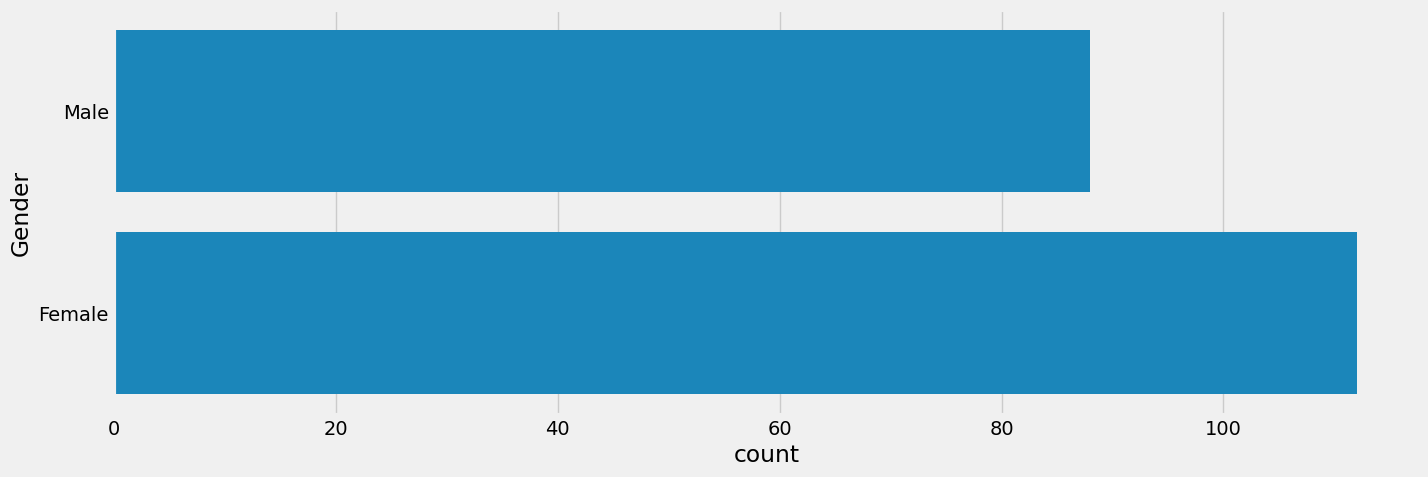

In [16]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = cdata)
plt.show()

<br>

### Relational Plots

Relatinal plots between Age, Annual Income and Spending score  

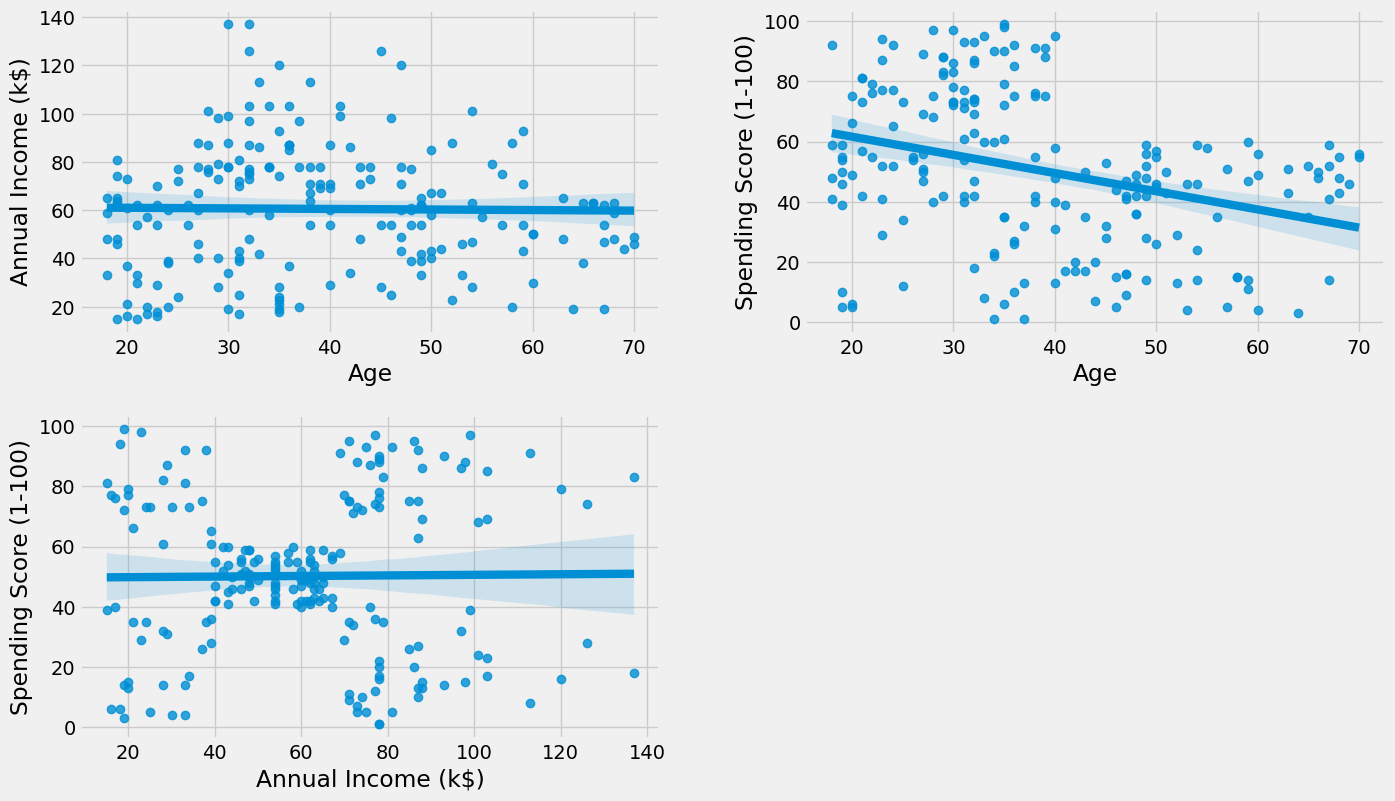

In [17]:
plt.figure(figsize=(15, 9))
n = 0

parameters = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in range(len(parameters)):
    for j in range(i + 1, len(parameters)):
        x = parameters[i]
        y = parameters[j]

        n += 1
        plt.subplot(2, 2, n)  # Adjusted to 2x2 grid for three unique combinations
        plt.subplots_adjust(hspace=0.25, wspace=0.25)
        sns.regplot(x=x, y=y, data=cdata)
        plt.xlabel(x)
        plt.ylabel(y)

plt.show()


From the first graph we could conclude that average annuall income of customers in the mall remains the same and doesn't vary by age.

We can clearly see from the second graph that the average spending score of customers fall as they age.

By the third graph we could say that spending score is independent of income and do not vary by increasing income. 

<br>


### Distribution Density Plots

Distribution Density Plots of customers based on Age, Annual Income and Spending score 

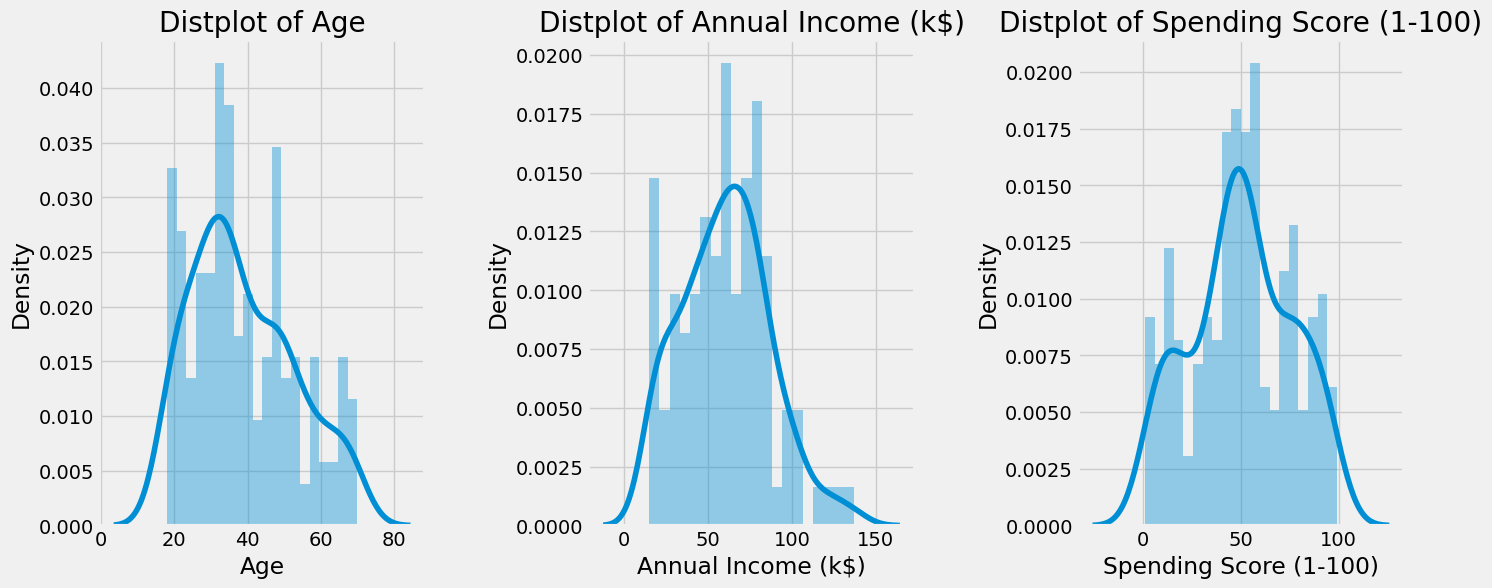

In [18]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(cdata[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

The distribution plot of age shows that most shoppers are around 37 years of age or younger and rest of customers are distributed with decresing magnitude, the older the age gets.

we see that most people have an annual income around 65000 dollars and spending score for many people is around 50.

Majority of people shopping in the mall have spending score ranges between 35 to 60.



<br>

 ## Clustering using K- means Algorithm

Now that we have strong grasp of our data set lets move towards clustering and segmenting customers.

.

### 1.Segmentation using Age and Spending Score

first we need to find the optimum amount of clusters(k) for our data, there are many ways to find optimum amount of clusters, but here we will be using the Elbow method.

The Elbow Method is a heuristic technique used to determine the optimal number of clusters (K) in a K-means clustering algorithm. It helps find a balance between number of clusters and the variance within each cluster.

In [19]:
X1 = cdata[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

To select n number of clusters using inertia,which is the squared distance between centroid and data points.

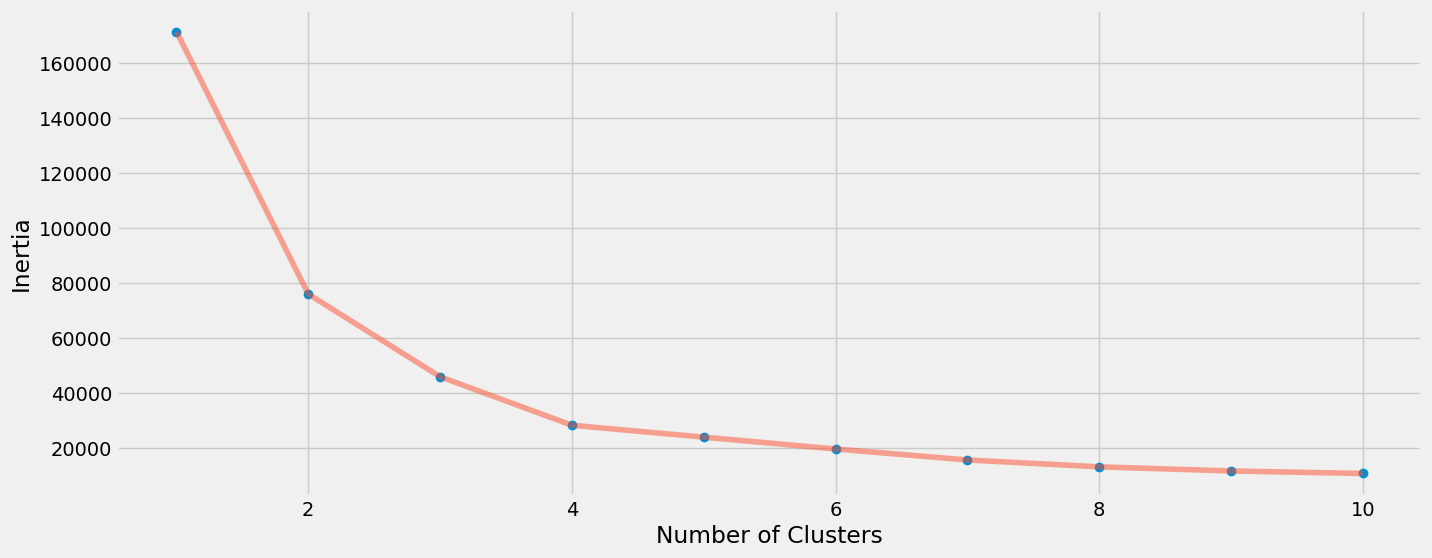

In [20]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()


<br>


Taking k=5 and training it according to this value

In [21]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

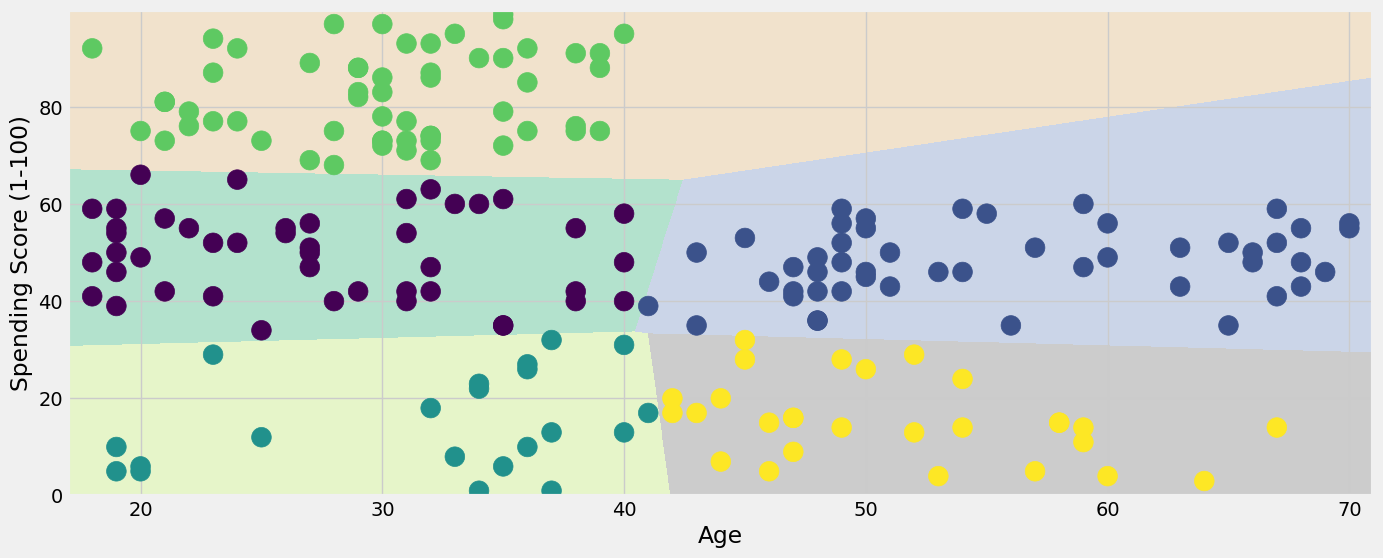

In [22]:
plt.figure(1 , figsize = (15, 6) )
#background shape
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = cdata , c = labels1 , 
            s = 200 )

plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

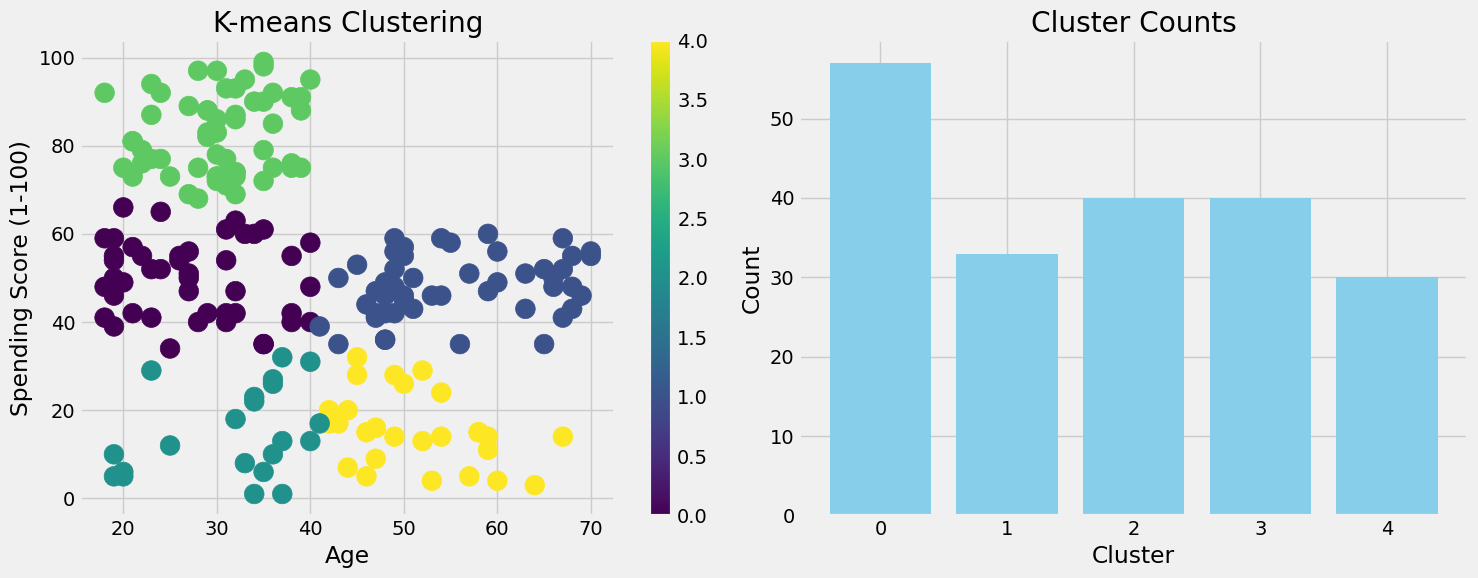

In [23]:
k = 5  
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X1)


unique_labels, counts = np.unique(labels, return_counts=True)


# Plotting the clusters and cluster counts
plt.figure(figsize=(15, 6))

# Plot the clusters
plt.subplot(1, 2, 1)
plt.scatter(x='Age', y='Spending Score (1-100)', data=cdata, c=labels1, s=200)
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Age')
plt.title('K-means Clustering')
plt.colorbar()

# Plot the cluster counts
plt.subplot(1, 2, 2)
plt.bar(unique_labels, counts, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Counts')

plt.tight_layout()
plt.show()

.

### 2. Segmentation using Annual Income and Spending Score

In [24]:
'''Annual Income and spending Score'''
X2 = cdata[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

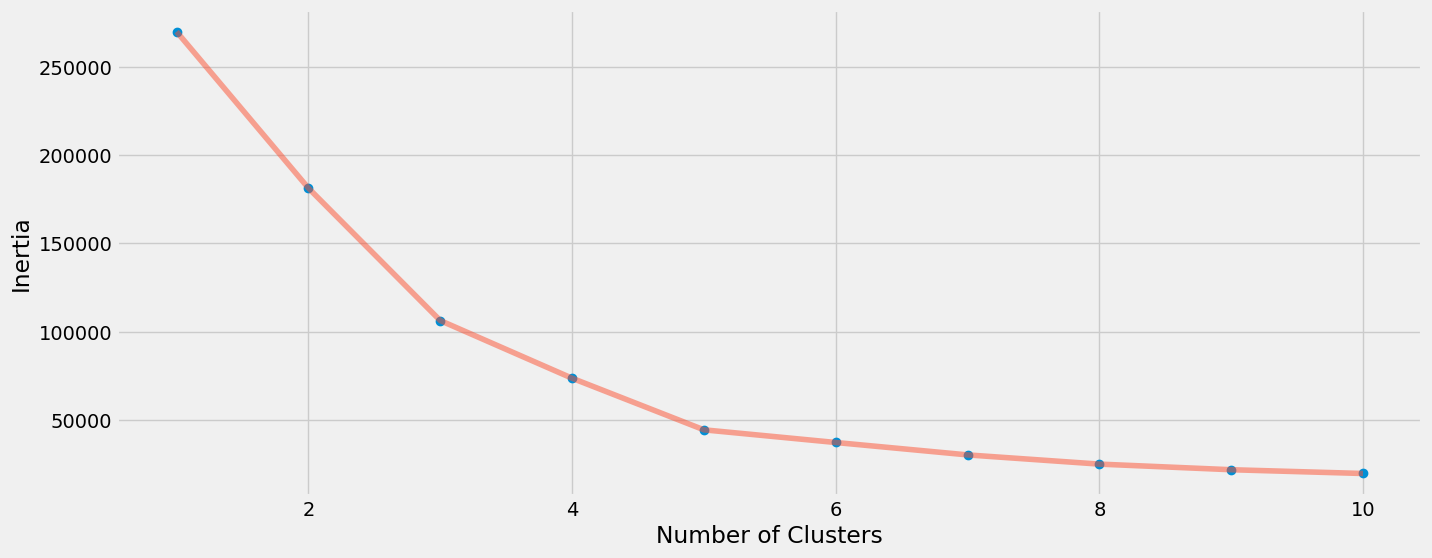

In [25]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

<br>

Taking K=5 and retraining model with this value

In [26]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

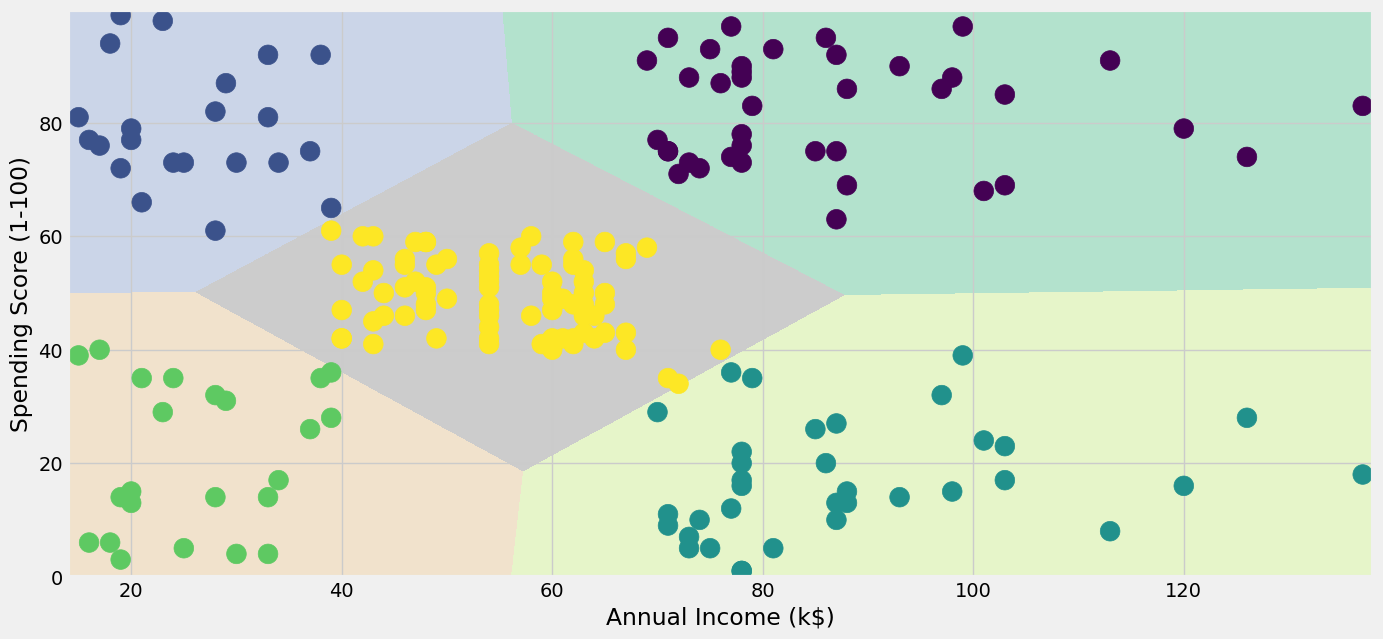

In [27]:
plt.figure(1 , figsize = (15 , 7) )

#background shapes
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')


plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = cdata , c = labels2 , 
            s = 200 )
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

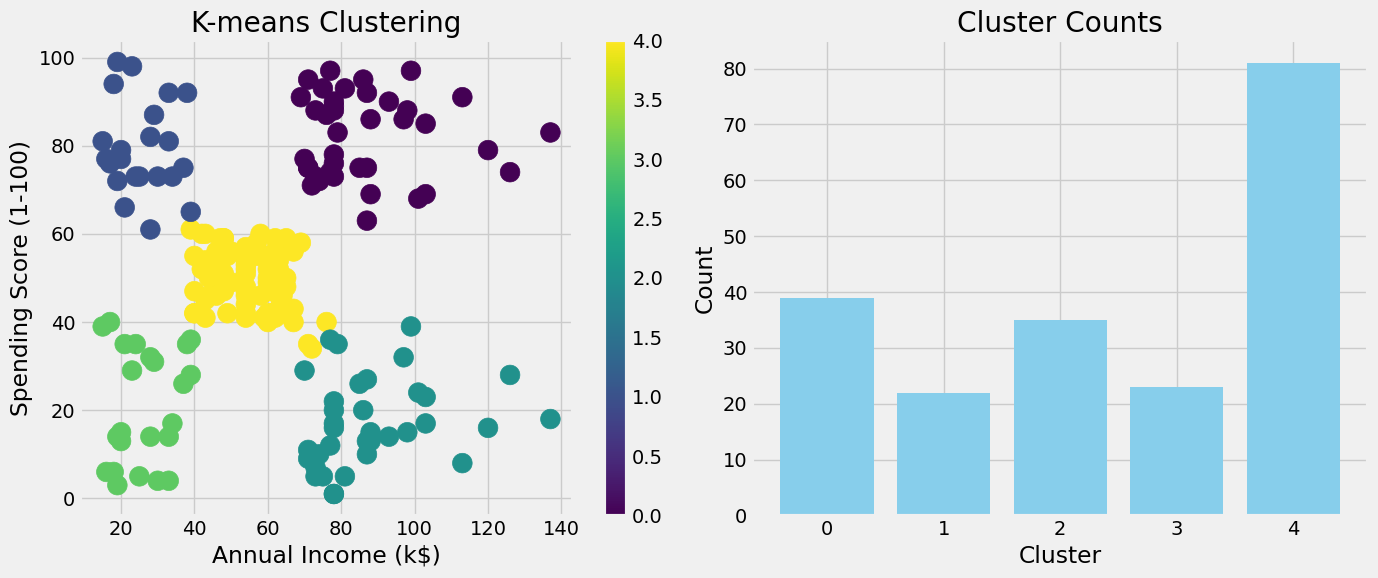

In [28]:
unique_labels2, counts2 = np.unique(labels2, return_counts=True)


# Plotting the clusters and cluster counts
plt.figure(figsize=(14, 6))

# Plot the clusters
plt.subplot(1, 2, 1)
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=cdata, c=labels2, s=200)
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Annual Income (k$)')
plt.title('K-means Clustering')
plt.colorbar()

# Plot the cluster counts
plt.subplot(1, 2, 2)
plt.bar(unique_labels2, counts2, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Counts')

plt.tight_layout()
plt.show()

.

### 3.Segmentation using Age , Annual Income and Spending Score

In [29]:
X3 = cdata[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

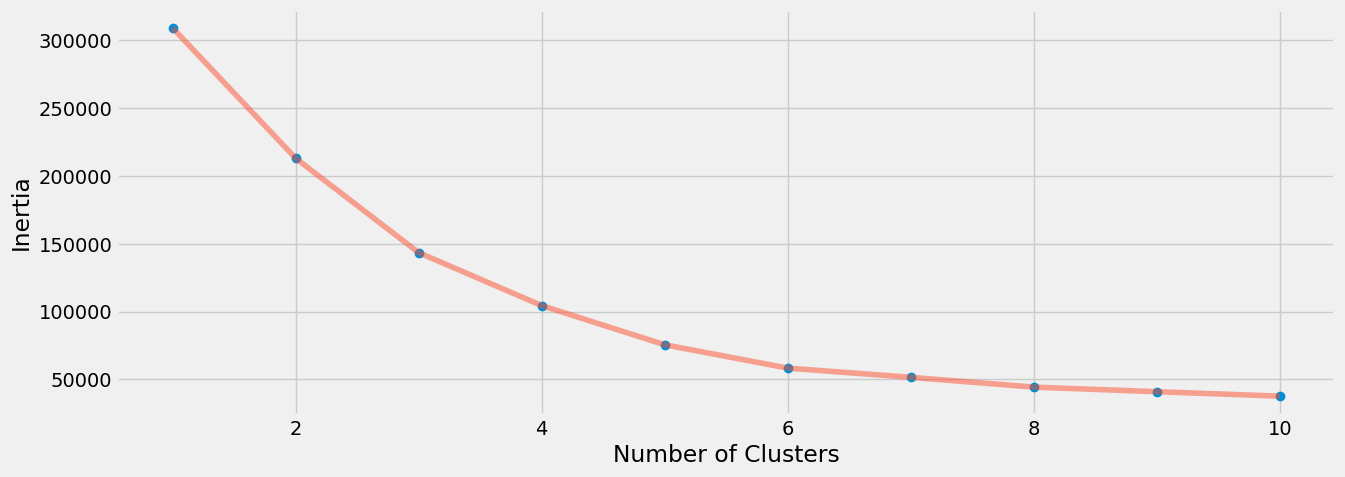

In [30]:
plt.figure(1 , figsize = (14 ,5))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()


<br>

Taking k=6 for this parameter combo and retraining the model with it.

In [31]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

<br>

#### Plotting the Graph

In [32]:
unique_labels3, counts3 = np.unique(labels3, return_counts=True)


# Update the 'label3' column in 'cdata' with the new labels
cdata['label3'] = labels3

# Plotting the clusters and cluster counts
trace1 = go.Scatter3d(
    x=cdata['Age'],
    y=cdata['Spending Score (1-100)'],
    z=cdata['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=cdata['label3'],
        size=15,
        line=dict(
            color=cdata['label3'],
            width=12
        ),
        opacity=0.9
    )
)

data = [trace1]
layout = go.Layout(
    title='Clusters (k=6)',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income')
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()


In [33]:
plt.figure(1 , figsize = (14 ,7))
unique_labels3, counts3 = np.unique(labels3, return_counts=True)

# Display the count of each cluster
for label, count in zip(unique_labels3, counts3):

# Create a bar chart to represent the cluster counts
    bar_chart = go.Figure(
    data=[go.Bar(x=unique_labels3, y=counts3, marker_color=unique_labels3)],
    layout=go.Layout(title='Cluster Counts', xaxis=dict(title='Cluster'), yaxis=dict(title='Count'))
)

bar_chart.show()

<Figure size 1400x700 with 0 Axes>

<br>

### **Segment description**

<br>

**Cluster 0 :**  This Demographic segment is characterized by individuals boasting an income significantly higher than the average, yet exhibiting a notably restrained spending score. Remarkably, this group demonstrates a remarkable even distribution across all age groups.

**Cluster 1 :** Within this demographic segment, individuals typically maintain an income hovering around the average or slightly below, accompanied by a moderate spending score. Notably, this group predominantly comprises individuals in the older age bracket, spanning from 40 to 70 years old, suggesting a specific financial pattern within this age range.



**Cluster 2 :** This demographic segment encapsulates the youth, ranging in age from 18 to 35, boasting incomes that surpass the average and often fall into the high-income bracket. Intriguingly, their spending score mirrors this financial affluence, signifying a pronounced propensity for consumption and economic activity.


**Cluster 3 :** This segment represents individuals with incomes that are around average or slightly below, accompanied by a typical spending behavior. However, what sets this segment apart from cluster one is its composition primarily consisting of young adults aged 18 to 35. Notably, a significant proportion of this segment falls within the age range of 20 to 25, showcasing a distinctive age concentration.

**Cluster 4 :** This specific demographic segment comprises individuals with lower incomes, exhibiting a conservative spending score. Interestingly, they are evenly dispersed across various age groups, demonstrating a consistent financial pattern regardless of age.


**Cluster 5 :** Within this cluster, we find young individuals aged between 20 and 30, characterized by their modest incomes. Despite their lower income levels, they demonstrate a significant spending score, suggesting a particular financial behavior that prioritizes spending despite financial constraints.

<br>


<br>

### **Marketing stratergies for each customer Segment**

**Cluster 0: High-Income, Low Spending Score**

Target this group with premium and exclusive products or services that align with their high-income status.
Offer loyalty programs, special discounts, or incentives to encourage them to spend more.
Create an upscale shopping environment and provide exceptional customer service to enhance their shopping experience.

**Cluster 1: Average Income, Moderate Spending Score (Older Age)**

Focus on marketing products or services that cater to the needs and preferences of older age groups.
Promote value for money and emphasize the quality and durability of products.
Consider hosting events or activities tailored to the interests of older customers to encourage spending.

**Cluster 2: High-Income Youth (18-35) with High Spending Score**

Target this group with trendy and high-end products that match their spending habits.
Use social media and influencer marketing to reach this tech-savvy demographic.
Organize events, pop-up shops, or exclusive product launches to create excitement and encourage them to visit the mall frequently.

**Cluster 3: Average Income Youth (18-35) with Typical Spending Behavior**

Offer products that are affordable, fashionable, and align with the preferences of young adults.
Use digital marketing and social media to engage with this tech-savvy audience.
Consider loyalty programs or discounts to attract and retain this group, especially those in the 20-25 age range.

**Cluster 4: Low-Income with Conservative Spending**

Focus on providing budget-friendly options and deals.
Offer practical products and essential items at competitive prices.
Consider educational workshops or events that help this group make the most of their limited budget.

**Cluster 5: Modest Income Youth (20-30) with High Spending Score**

Target this group with affordable, trendy, and aspirational products.
Highlight financing options or layaway plans to make higher-priced items accessible.
Engage with them on social media and encourage user-generated content to create a sense of community and belonging.